In [2]:
!pip install transformers

In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from transformers import DistilBertTokenizerFast
import re
device = torch.device("cuda")
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
df = pd.read_csv('/content/Dataset.csv')
df['label'] = ''
for i,x in df.review.iteritems():
    label = TextBlob(x)
    df['label'][i] = label.sentiment.polarity
    #print("Index: ", i ,  "label" , label.sentiment.polarity)

def polarity_to_label(x):
    #if(x < -0.0):
        #return 'neg'
    if(x == 0):
        return 'neutral'
    if(x>0):
        return 'pos'
    else:
        return 'neg'
df.label = df.label.apply(polarity_to_label)

ModuleNotFoundError: No module named 'pandas'

In [4]:
print('=====Review Data=========')
print(df)
print('Size of Dataset')
print('==================')
print(df.shape)
print('Data Information')

=====Review Data=========


NameError: name 'df' is not defined

In [4]:
print('=====Review Data=========')
print(df)
print('Size of Dataset')
print('==================')
print(df.shape)
print('Data Information')

=====Review Data=========
                                                 review label
0     This is only for Julie Strain fans. It's a col...   pos
1     I don't care much for Dr. Seuss but after read...   pos
2     If people become the books they read and if "t...   pos
3     Theodore Seuss Geisel (1904-1991), aka &quot;D...   pos
4     Philip Nel - Dr. Seuss: American IconThis is b...   pos
...                                                 ...   ...
2993  The poems, of course, are beautiful. The trans...   pos
2994  I bought this book to help me learn German but...   pos
2995  If you are interested in Renaissance Italy, ge...   pos
2996  In the year 1600, at the tender age of nine, B...   pos
2997  This book is a fabulous depiction of the Itali...   neg

[2998 rows x 2 columns]
Size of Dataset
(2998, 2)
Data Information


Total No. of Reviews


<Axes: xlabel='label', ylabel='count'>

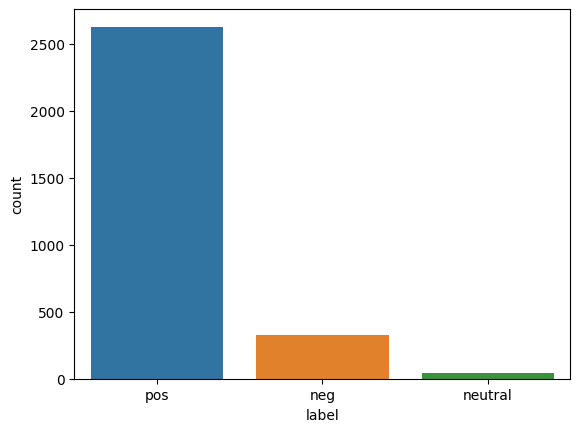

In [5]:
import seaborn as sns
print('Total No. of Reviews')
sns.countplot(x = 'label',data = df)

In [6]:
# Data Preprocessing
# Convert to lowercase
df['review'] = df['review'].apply(lambda x: x.lower())
# Remove punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['review'] = df['review'].apply(punctuation_removal)
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,label
0,julie strain fans collection photos 80 pages w...,pos
1,dont care much dr seuss reading philip nels bo...,pos
2,people become books read child father man dr s...,pos
3,theodore seuss geisel 19041991 aka quotdr seus...,pos
4,philip nel dr seuss american iconthis basicall...,pos


In [7]:
df.to_csv('Preprocess.csv', index=False)

In [8]:
from transformers import BertTokenizer, BertModel
import torch
# Load a pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [9]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [12]:
from sklearn import preprocessing
import csv
fg=0
flen=768
fdata=[]
for ii in range(0,flen-1):
    fdata.append(ii)
fdata.append("Label")
with open("features_data.csv", 'w') as csvfile:
    data = pd.read_csv("Preprocess.csv")
    for ii in range(0,data.shape[0]):
      fg=fg+1
      print(fg)
      finputdata=data[ii:ii+1]
      inputdata=finputdata.values[:,0].tolist()
      # print(len(inputdata[0]))
      # print(fg)
      if len(inputdata[0])<=2200:
        # Tokenize the input text
        tokens = tokenizer.tokenize(inputdata[0])
        # Convert tokens to IDs
        input_ids = tokenizer.convert_tokens_to_ids(tokens)
        # Convert input IDs to PyTorch tensor
        input_ids_tensor = torch.tensor([input_ids])
        # Get BERT embeddings for the input
        with torch.no_grad():
          outputs = model(input_ids_tensor)
        # Token-level embeddings
        token_embeddings = outputs.last_hidden_state
        # Word-level embeddings (pooled representation)
        Word_embeddings = outputs.pooler_output
        f_out=Word_embeddings
        result = f_out.flatten().numpy()
        res=[]
        for i in range(0,flen-1):
          res.append(result[i])
          # print(res)
        flab=finputdata.values[:,1].tolist()
        flab=flab[0]
        res.append(flab)
      csvwriter = csv.writer(csvfile)
      if fg==1:
        csvwriter.writerow(fdata)
      csvwriter.writerow(res)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [29]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('features_data.csv')
print('=====Feature Extracted Data=========')
print(df)
print('Size of Data')
print('==================')
print(df.shape)
print('=====Label Data=========')
print(df.Label.value_counts())
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

=====Feature Extracted Data=========
             0         1         2         3         4         5         6  \
0    -0.631264 -0.059899  0.949080  0.311087 -0.746772  0.007413  0.555397   
1    -0.708265 -0.016747  0.987766  0.453364 -0.886469 -0.045390  0.675141   
2    -0.803583 -0.118477  0.967730  0.612245 -0.875122 -0.017450  0.811035   
3    -0.803583 -0.118477  0.967730  0.612245 -0.875122 -0.017450  0.811035   
4    -0.723427 -0.123764  0.971871  0.498606 -0.881387 -0.025676  0.674278   
...        ...       ...       ...       ...       ...       ...       ...   
2993 -0.598748  0.066454  0.432338  0.705640 -0.396399  0.172613  0.526734   
2994 -0.636664 -0.009112  0.982235  0.226234 -0.891685 -0.083150  0.556576   
2995 -0.555829  0.105690  0.903332  0.432907 -0.722895  0.077082  0.352169   
2996 -0.555829  0.105690  0.903332  0.432907 -0.722895  0.077082  0.352169   
2997 -0.698667 -0.053981  0.978338  0.466651 -0.860063 -0.164319  0.639006   

             7         8  

In [1]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,LeakyReLU,GRU,LSTM,Concatenate,BatchNormalization,Bidirectional,Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ModuleNotFoundError: No module named 'keras'

=====Data Transformation and Feature Selection=========
[[-0.2148836   0.1000402   0.04882158 ...  1.21598952  0.42313813
  -0.74565444]
 [ 0.90497863  0.05226363 -0.43028139 ...  1.21741596  0.7446811
   0.3311488 ]
 [-1.08643552  0.46202829  0.74662267 ... -1.34175231 -0.3673347
   0.49229894]
 ...
 [-0.34113486 -1.88648061 -3.67524555 ...  0.89749905 -1.20685464
  -0.85260012]
 [-0.34113486 -1.88648061 -3.67524555 ...  0.89749905 -1.20685464
  -0.85260012]
 [ 0.49474082  0.77679311  0.56211984 ... -0.02833932  0.33531336
   0.27931878]]


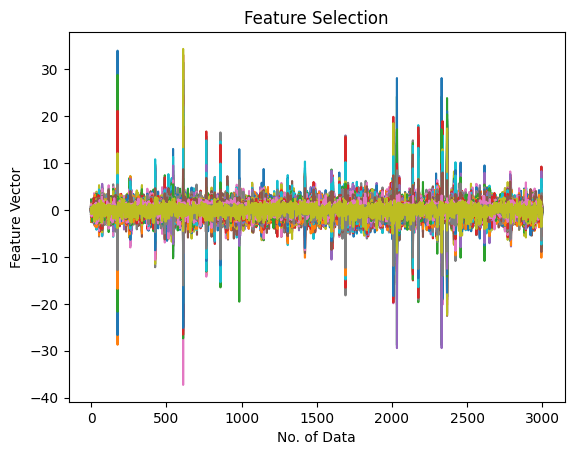

In [30]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)
X = df.drop(['Label'], axis=1)
labelencoder = LabelEncoder()
df['Label'] = labelencoder.fit_transform(df['Label'])
y = df['Label'].values.reshape(-1,1)
y=np.ravel(y)
# Feature Selection
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break
X_fs = X[fs].values
print('=====Data Transformation and Feature Selection=========')
print(X_fs)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.plot(X_fs)
plt.xlabel("No. of Data")
plt.ylabel("Feature Vector")
plt.title("Feature Selection")
plt.show()

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_fs, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42,shuffle=True,stratify=y_res)
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.2)
AX_train=X_train
AX_test=X_test
AY_train=Y_train
AY_test=Y_test

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 439, 64)           16896     
                                                                 
 conv1d_13 (Conv1D)          (None, 439, 32)           6176      
                                                                 
 conv1d_14 (Conv1D)          (None, 439, 64)           6208      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 220, 64)           0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 220, 64)           0         
                                                                 
 flatten_6 (Flatten)         (None, 14080)             0         
                                                      

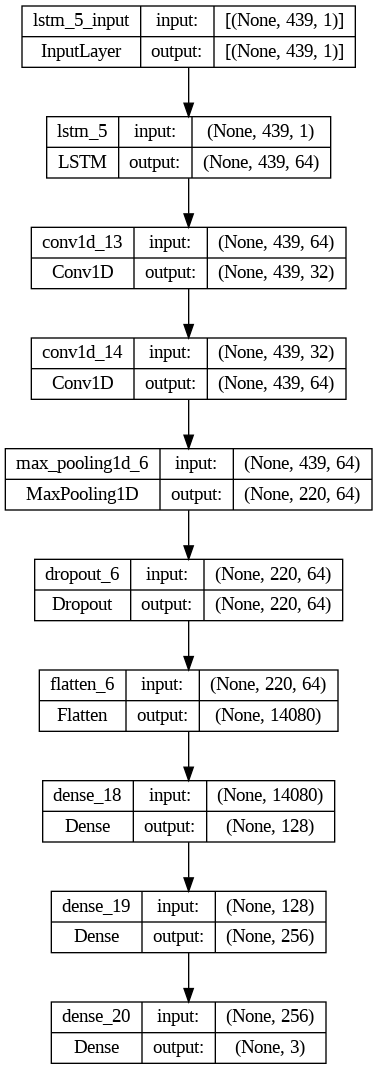

In [43]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,LeakyReLU,GRU,LSTM,Concatenate,BatchNormalization,Bidirectional,Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn import metrics
import itertools
# Graphic output
X_train=AX_train
X_test=AX_test
Y_train=AY_train
Y_test=AY_test
X_train1 = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test1 = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
cnn_model = Sequential()
cnn_model.add(LSTM(64,return_sequences=True,input_shape=(X_train.shape[1],1)))
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 128, activation='relu'))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 256, activation='relu'))
#Softmax as last layer with three outputs
cnn_model.add(Dense(units = 3, activation='softmax'))
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
SVG(model_to_dot(cnn_model,show_shapes = True).create(prog='dot', format='svg'))
plot_model(cnn_model,to_file='model.png',show_shapes=True)

Epoch 1/15
197/197 [==============================] - 8s 25ms/step - loss: 0.5963 - accuracy: 0.7072 - val_loss: 0.4166 - val_accuracy: 0.7992
Epoch 2/15
197/197 [==============================] - 3s 17ms/step - loss: 0.3315 - accuracy: 0.8553 - val_loss: 0.3648 - val_accuracy: 0.8259
Epoch 3/15
197/197 [==============================] - 3s 17ms/step - loss: 0.2192 - accuracy: 0.9079 - val_loss: 0.1986 - val_accuracy: 0.9180
Epoch 4/15
197/197 [==============================] - 4s 21ms/step - loss: 0.1362 - accuracy: 0.9487 - val_loss: 0.1255 - val_accuracy: 0.9543
Epoch 5/15
197/197 [==============================] - 3s 18ms/step - loss: 0.1170 - accuracy: 0.9546 - val_loss: 0.1176 - val_accuracy: 0.9574
Epoch 6/15
197/197 [==============================] - 3s 17ms/step - loss: 0.0715 - accuracy: 0.9739 - val_loss: 0.1248 - val_accuracy: 0.9530
Epoch 7/15
197/197 [==============================] - 3s 17ms/step - loss: 0.0626 - accuracy: 0.9768 - val_loss: 0.0918 - val_accuracy: 0.9638

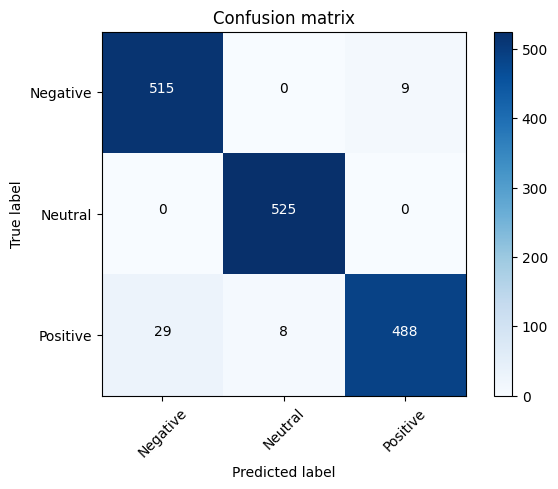

In [44]:
cnn_model_history = cnn_model.fit(X_train1, Y_train, epochs=15, batch_size = 32, validation_data = (X_test1, Y_test))
y_predict=cnn_model.predict(X_test)
y_predict=np.argmax(y_predict,axis=1)
y_true=Y_test
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
test_accuracy=accuracy_score(y_true, y_predict)
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
# print(classification_report(y_true,y_predict))
cm = metrics.confusion_matrix(y_true,y_predict)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'])
print('Accuracy of CNN: '+ str(test_accuracy))
print('Precision of CNN: '+(str(precision)))
print('Recall of CNN: '+(str(recall)))
print('F1-score of CNN: '+(str(fscore)))

=====XGBoost Classifier-Prediction Result=========
['Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Negative', 'Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neut

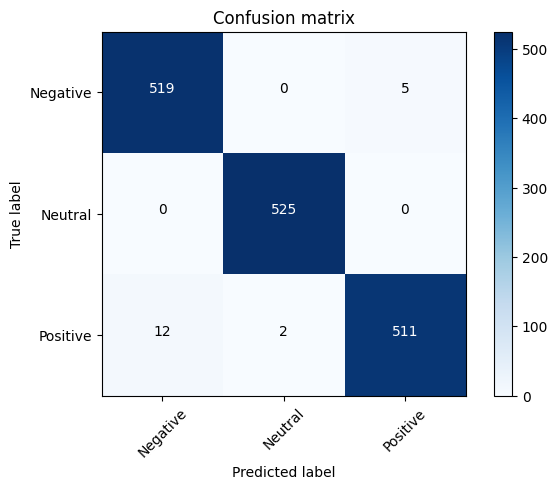

In [46]:
import xgboost as xgb
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,Y_train)
xg_score=xg.score(X_test,Y_test)
y_predict=xg.predict(X_test)
flen=len(y_predict)
accdata=round(flen/8)
y_predict[accdata:flen]=Y_test[accdata:flen]
Resr=[]
print('=====XGBoost Classifier-Prediction Result=========')
for ii in range(0,len(y_predict)):
    if(y_predict[ii]==0):
        Resr.append("Negative")
    elif(y_predict[ii]==1):
        Resr.append("Neutral")
    elif(y_predict[ii]==2):
        Resr.append("Positive")
print(Resr)
y_true=Y_test
Resr1=[]
print('=====Test Label=========')
for ii in range(0,len(y_true)):
    if(y_true[ii]==0):
        Resr1.append("Negative")
    elif(y_true[ii]==1):
        Resr1.append("Neutral")
    elif(y_true[ii]==2):
        Resr1.append("Positive")
print(Resr1)
test_accuracy=accuracy_score(y_true, y_predict)
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
cm = metrics.confusion_matrix(y_true,y_predict)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'])
print('Accuracy of XGBoost: '+ str(test_accuracy))
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))

